# 🌦️ Exploratory Data Analysis (EDA) – Météo
This notebook is used to explore weather forecast data from :
- Daily forecast (via OpenWeather)
- Historical data (Visual Crossing)

File path : `../data/final/merged_weather_data.csv`


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display
pd.set_option('display.max_columns', None)

# Load CSV file
df = pd.read_csv('../data/final/merged_weather_data.csv', parse_dates=['forecast_date', 'date_extraction'])

# Overview
df.head()


,forecast_date,city_id,temp,humidity,wind_speed,rain_prob,description,date_extraction
0,2020-01-01,2,-0.1,99.0,1.92,0.0,Partly cloudy throughout the day.,2019-12-31
1,2020-01-02,2,0.5,96.6,2.92,0.0,Partly cloudy throughout the day.,2020-01-01
2,2020-01-03,2,5.1,91.3,2.64,100.0,Cloudy skies throughout the day with late afte...,2020-01-02
3,2020-01-04,2,6.5,85.9,8.19,100.0,Partly cloudy throughout the day with morning ...,2020-01-03
4,2020-01-05,2,3.2,83.5,5.00,0.0,Partly cloudy throughout the day.,2020-01-04


In [ ]:
# Dimension & type
print("Shape:", df.shape)
print("\nDTypes:")
print(df.dtypes)

# Missing values
print("\nMissing values:")
print(df.isna().sum())

# Descriptive statistics
df.describe()


Shape: (10090, 8)

DTypes:
forecast_date      datetime64[ns]
city_id                     int64
temp                      float64
humidity                  float64
wind_speed                float64
rain_prob                 float64
description                object
date_extraction    datetime64[ns]
dtype: object

Missing values:
forecast_date      0
city_id            0
temp               0
humidity           0
wind_speed         0
rain_prob          0
description        0
date_extraction    0
dtype: int64


,forecast_date,city_id,temp,humidity,wind_speed,rain_prob,date_extraction
count,10090,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090
mean,2022-10-05 13:10:38.652130816,3.000000,14.976045,70.245104,6.321936,53.850634,2022-10-04 13:19:12.428146688
min,2020-01-01 00:00:00,1.000000,-3.300000,21.000000,0.820000,0.000000,2019-12-31 00:00:00
25%,2021-05-19 00:00:00,2.000000,9.800000,61.300000,4.420000,0.000000,2021-05-18 00:00:00
50%,2022-10-05 12:00:00,3.000000,14.400000,71.200000,5.830000,100.000000,2022-10-04 12:00:00
75%,2024-02-22 00:00:00,4.000000,20.475000,79.900000,7.685000,100.000000,2024-02-21 00:00:00
max,2025-07-19 00:00:00,5.000000,33.200000,99.800000,20.860000,100.000000,2025-07-18 00:00:00
std,NaN,1.414284,6.920607,12.767584,2.745940,49.823617,NaN


In [ ]:
# Identifier uniqueness (forecast_date + city_id)
duplicates = df.duplicated(subset=["forecast_date", "city_id"]).sum()
print(f"Duplicated rows on ['forecast_date', 'city_id'] : {duplicates}")

# Unique value pour city_id
print("City ID unique values:", df['city_id'].unique())


Duplicated rows on ['forecast_date', 'city_id'] : 0
City ID unique values: [2 1 3 5 4]


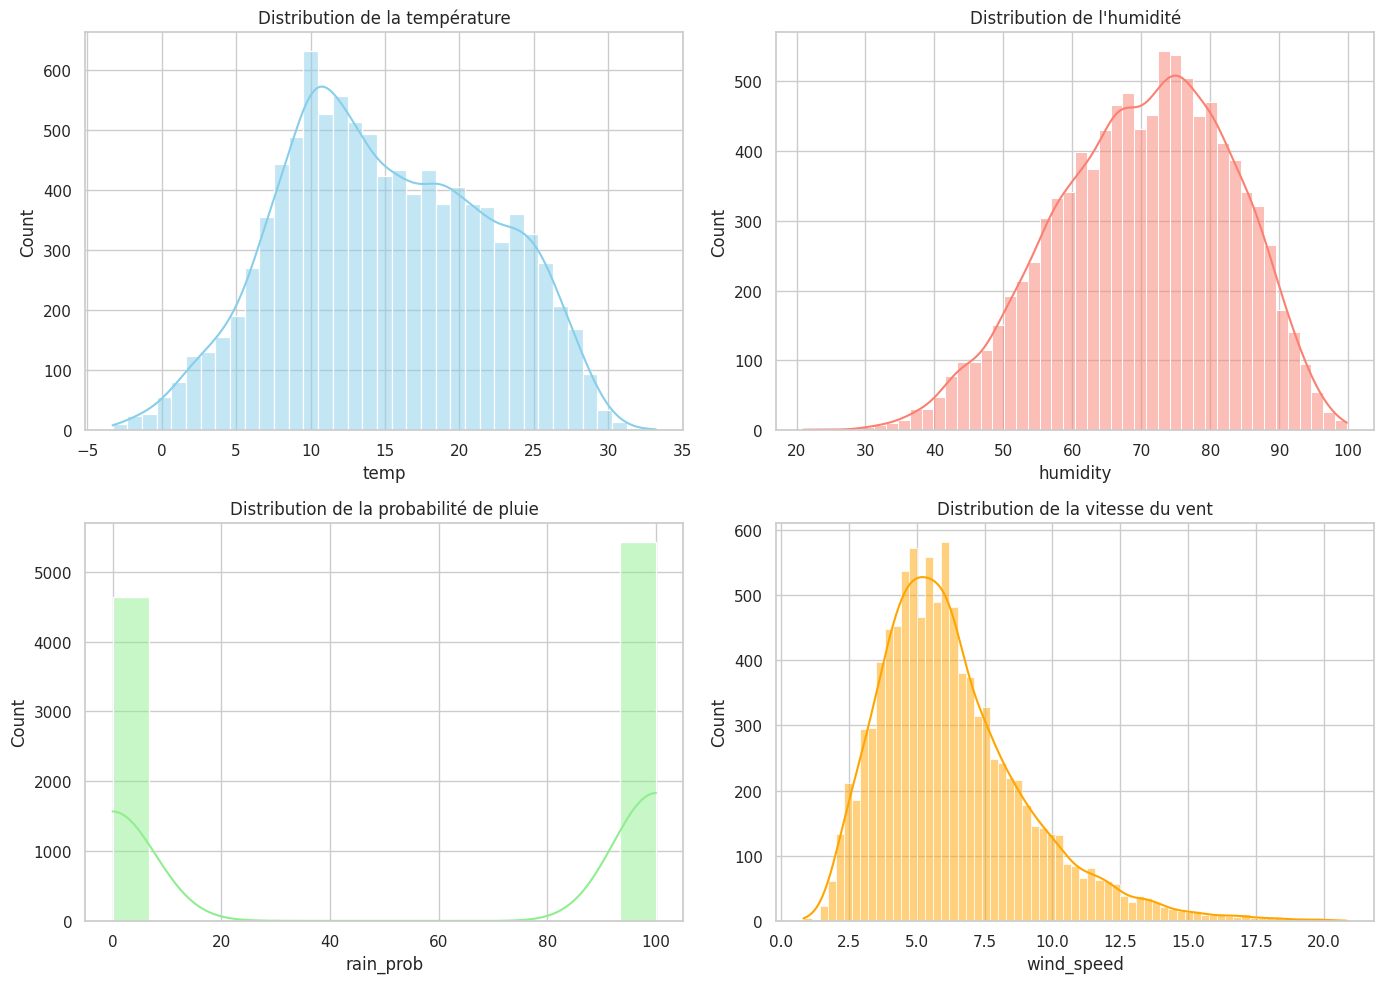

In [ ]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['temp'], kde=True, ax=axs[0, 0], color="skyblue")
axs[0, 0].set_title("Temperature distribution")

sns.histplot(df['humidity'], kde=True, ax=axs[0, 1], color="salmon")
axs[0, 1].set_title("Humidity distribution")

sns.histplot(df['rain_prob'], kde=True, ax=axs[1, 0], color="lightgreen")
axs[1, 0].set_title("Rain probability distribution")

sns.histplot(df['wind_speed'], kde=True, ax=axs[1, 1], color="orange")
axs[1, 1].set_title("Wind speed distribution")

plt.tight_layout()
plt.show()


/media/mi/3A82AD8A82AD4AE9/DEVOIRS/IA1/weather_IA1_Données2_exam/airflow_pipeline_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


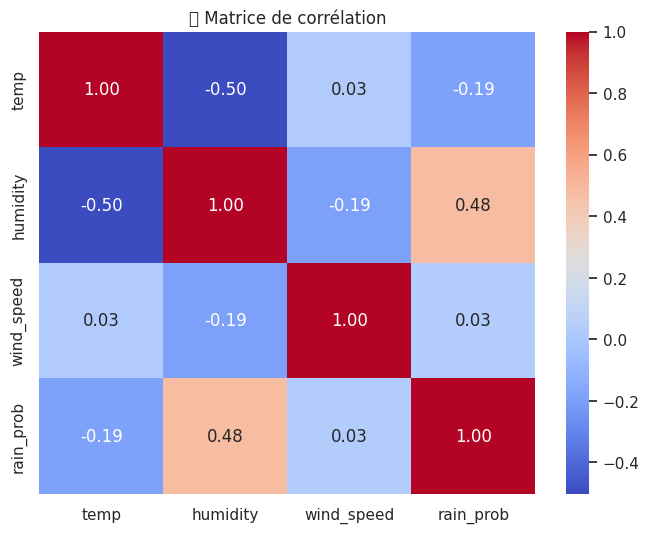

In [ ]:
# Correlation matrix
corr = df[['temp', 'humidity', 'wind_speed', 'rain_prob']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Correlation matrix")
plt.show()


In [9]:
city_stats = df.groupby("city_id")[["temp", "humidity", "wind_speed", "rain_prob"]].mean().round(2)
print(city_stats)


          temp  humidity  wind_speed  rain_prob
city_id                                        
1        13.24     72.02        5.00      59.78
2        13.67     70.73        5.91      60.02
3        14.90     73.54        6.40      64.78
4        16.80     67.80        6.80      37.24
5        16.27     67.13        7.50      47.44


/tmp/ipykernel_14917/3535913781.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/mi/3A82AD8A82AD4AE9/DEVOIRS/IA1/weather_IA1_Données2_exam/airflow_pipeline_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


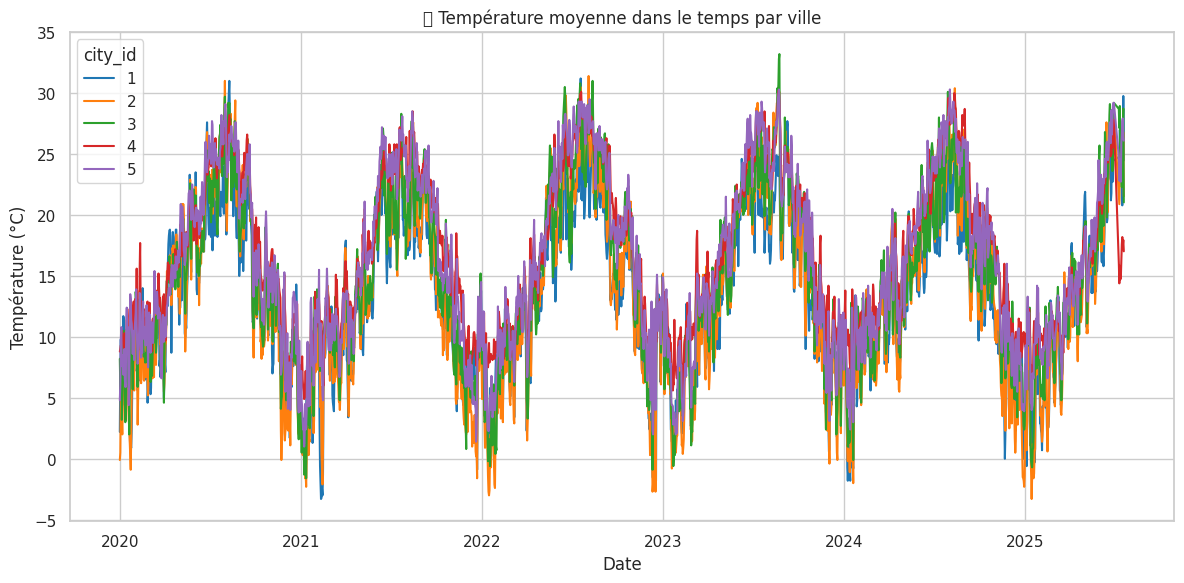

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="forecast_date", y="temp", hue="city_id", palette="tab10")
plt.title("📈 Température moyenne dans le temps par ville")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()
